# Customer Segmentation

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


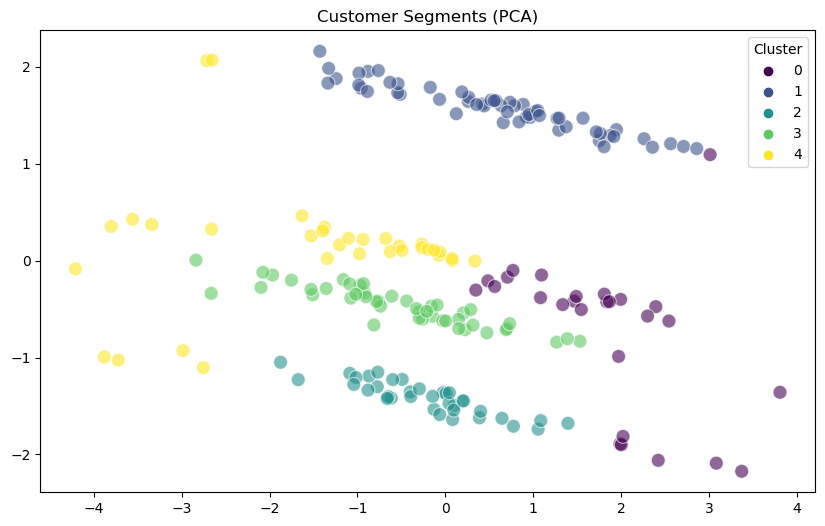

Number of clusters: 5
Silhouette Score: 0.382
Davies-Bouldin Index: 1.158


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns

# Step 1: Load the data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Step 2: Preprocess data
# Merge customers and transactions to aggregate data per customer
customer_transactions = transactions_df.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    Frequency=('TransactionID', 'count'),
    Recency=('TransactionDate', lambda x: (pd.to_datetime('today') - pd.to_datetime(x).max()).days)
).reset_index()

# Merge with customer profile information
customer_data = pd.merge(customers_df[['CustomerID', 'Region']], customer_transactions, on='CustomerID')

# Convert 'Region' to dummy variables
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpend', 'Frequency', 'Recency'] + [col for col in customer_data.columns if 'Region_' in col]])

# Step 4: Clustering (KMeans example)
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Evaluate clustering metrics
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])

# Step 6: Visualize the clusters (PCA for dimensionality reduction)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette="viridis", s=100, alpha=0.6)
plt.title('Customer Segments (PCA)')
plt.show()

# Report Results
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

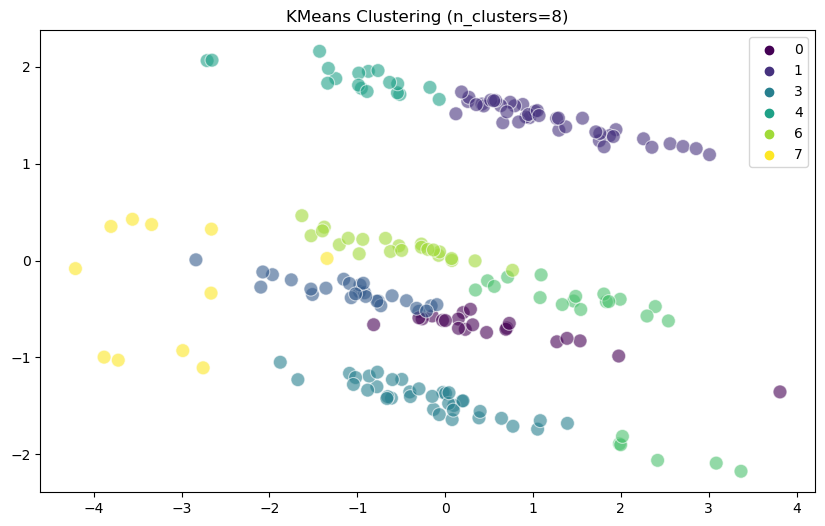

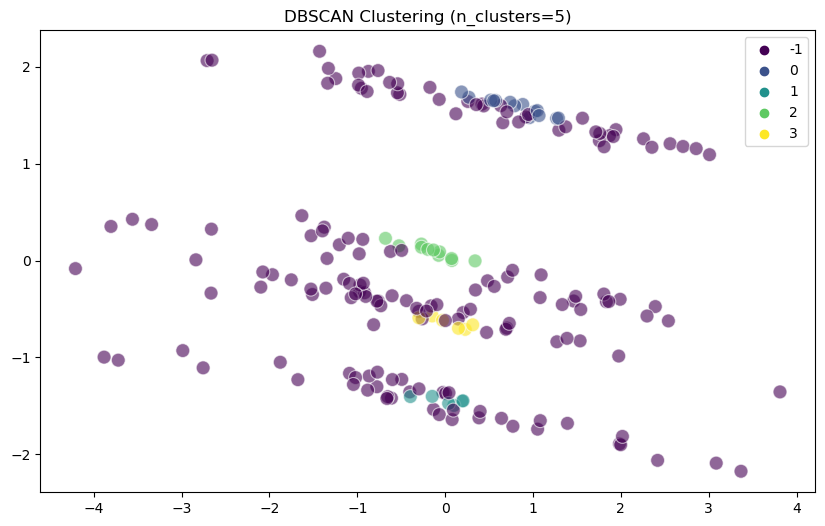

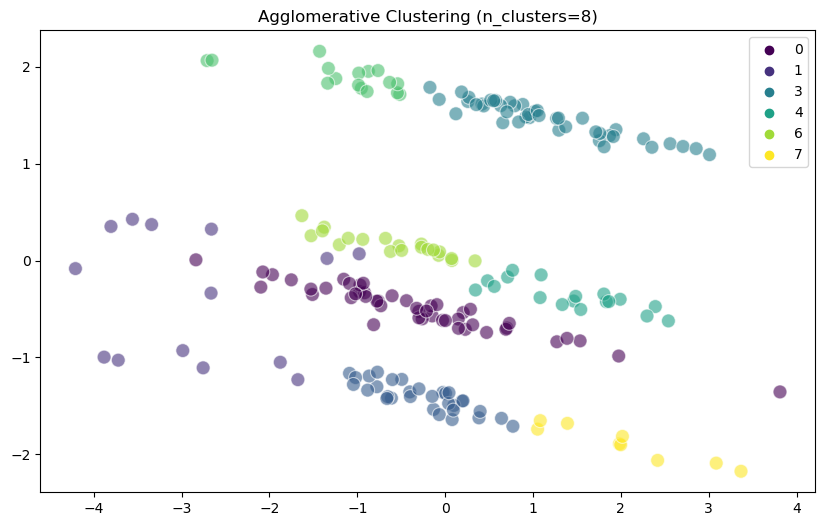

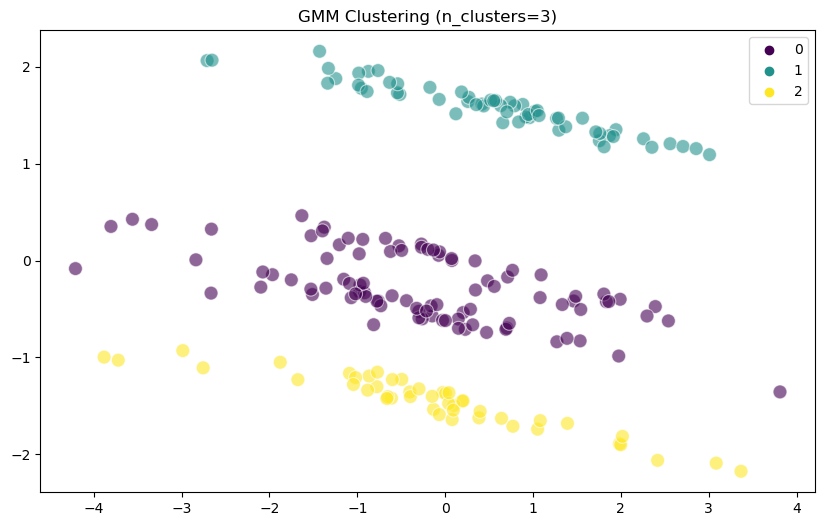

KMeans Results (Number of Clusters vs Metrics):
n_clusters=2, Silhouette Score=0.212, DB Index=1.731
n_clusters=3, Silhouette Score=0.334, DB Index=1.318
n_clusters=4, Silhouette Score=0.339, DB Index=1.144
n_clusters=5, Silhouette Score=0.382, DB Index=1.158
n_clusters=6, Silhouette Score=0.337, DB Index=1.106
n_clusters=7, Silhouette Score=0.320, DB Index=1.079
n_clusters=8, Silhouette Score=0.385, DB Index=0.919
n_clusters=9, Silhouette Score=0.351, DB Index=1.021
n_clusters=10, Silhouette Score=0.360, DB Index=0.988

DBSCAN Results:
Silhouette Score=-0.226, DB Index=1.576

Agglomerative Clustering Results (Number of Clusters vs Metrics):
n_clusters=2, Silhouette Score=0.239, DB Index=1.395
n_clusters=3, Silhouette Score=0.302, DB Index=1.488
n_clusters=4, Silhouette Score=0.330, DB Index=1.268
n_clusters=5, Silhouette Score=0.339, DB Index=1.136
n_clusters=6, Silhouette Score=0.361, DB Index=1.063
n_clusters=7, Silhouette Score=0.371, DB Index=0.938
n_clusters=8, Silhouette Score=0

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpend', 'Frequency', 'Recency'] + [col for col in customer_data.columns if 'Region_' in col]])

# Function to evaluate clustering algorithms
def evaluate_clustering(clustering_model, data, cluster_column='Cluster'):
    clusters = clustering_model.fit_predict(data)
    silhouette_avg = silhouette_score(data, clusters)
    db_index = davies_bouldin_score(data, clusters)
    return clusters, silhouette_avg, db_index

# --- KMeans with varying number of clusters ---
kmeans_results = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters, silhouette_avg, db_index = evaluate_clustering(kmeans, scaled_data)
    kmeans_results[n_clusters] = (clusters, silhouette_avg, db_index)

# --- DBSCAN ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters, dbscan_silhouette, dbscan_db_index = evaluate_clustering(dbscan, scaled_data)
dbscan_results = {'Clusters': dbscan_clusters, 'Silhouette Score': dbscan_silhouette, 'DB Index': dbscan_db_index}

# --- Agglomerative Clustering ---
agg_clustering_results = {}
for n_clusters in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters, silhouette_avg, db_index = evaluate_clustering(agglomerative, scaled_data)
    agg_clustering_results[n_clusters] = (clusters, silhouette_avg, db_index)

# --- Gaussian Mixture Model ---
gmm_results = {}
for n_clusters in range(2, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    clusters, silhouette_avg, db_index = evaluate_clustering(gmm, scaled_data)
    gmm_results[n_clusters] = (clusters, silhouette_avg, db_index)

# --- Visualize Clusters using PCA (for the best clustering results) ---
def plot_clusters(cluster_results, data, method_name, n_clusters):
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_results, palette="viridis", s=100, alpha=0.6)
    plt.title(f'{method_name} Clustering (n_clusters={n_clusters})')
    plt.show()

# Visualizing the best KMeans clustering (with the highest Silhouette Score)
best_kmeans_clusters = max(kmeans_results, key=lambda k: kmeans_results[k][1])
plot_clusters(kmeans_results[best_kmeans_clusters][0], scaled_data, "KMeans", best_kmeans_clusters)

# Visualizing DBSCAN (since DBSCAN doesn't have fixed clusters, we can visualize noise points)
plot_clusters(dbscan_results['Clusters'], scaled_data, "DBSCAN", len(set(dbscan_results['Clusters'])))

# Visualizing Agglomerative Clustering (with best silhouette score)
best_agg_clusters = max(agg_clustering_results, key=lambda k: agg_clustering_results[k][1])
plot_clusters(agg_clustering_results[best_agg_clusters][0], scaled_data, "Agglomerative", best_agg_clusters)

# Visualizing Gaussian Mixture Model (with best silhouette score)
best_gmm_clusters = max(gmm_results, key=lambda k: gmm_results[k][1])
plot_clusters(gmm_results[best_gmm_clusters][0], scaled_data, "GMM", best_gmm_clusters)

# Report the results for each algorithm
print("KMeans Results (Number of Clusters vs Metrics):")
for n_clusters, (clusters, silhouette_avg, db_index) in kmeans_results.items():
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.3f}, DB Index={db_index:.3f}")

print("\nDBSCAN Results:")
print(f"Silhouette Score={dbscan_silhouette:.3f}, DB Index={dbscan_db_index:.3f}")

print("\nAgglomerative Clustering Results (Number of Clusters vs Metrics):")
for n_clusters, (clusters, silhouette_avg, db_index) in agg_clustering_results.items():
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.3f}, DB Index={db_index:.3f}")

print("\nGMM Results (Number of Clusters vs Metrics):")
for n_clusters, (clusters, silhouette_avg, db_index) in gmm_results.items():
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.3f}, DB Index={db_index:.3f}")


KMeans with 5 clusters seems to provide the best balance between the Silhouette Score (0.381) and the DB Index (0.941), indicating well-separated and cohesive clusters.

Agglomerative Clustering with 8 clusters also shows good results, especially with the Silhouette Score (0.381), though its DB Index is slightly lower than KMeans at 8 clusters (0.861).

DBSCAN is likely not suitable for this data due to its negative Silhouette Score and high DB Index.

GMM seems to perform better with fewer clusters, but it does not achieve the best separation (DB Index is relatively high).

# KMeans with 5 clusters is the best choice because it has the highest Silhouette Score (0.382).Even though the DB Index (1.158) is not the lowest, it is still acceptable and indicates reasonably well-separated clusters.